## Centroid Models Assignment

In [5]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [6]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

**Take some time to explore the dataframe above.**

In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df_dummy = pd.get_dummies(df['Genre'])
df_dummy.head()
df =pd.concat([df, df_dummy], axis=1)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


In [9]:
df.keys()

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Female', 'Male'],
      dtype='object')

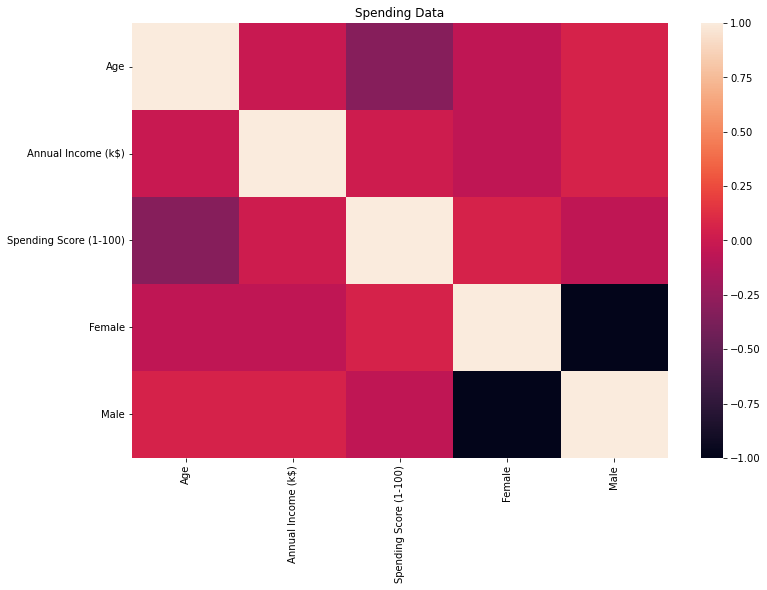

In [10]:
plot_data = df[['Age', 'Annual Income (k$)','Spending Score (1-100)', 'Female', 'Male']] 

heat_data_corr = plot_data.corr()

sns.heatmap(heat_data_corr)
plt.title('Spending Data')

plt.show()
# x1 = 'Age'
# y1 = 'Spending Score (1-100)'

# x2 = 'Age'
# y2 = 'Annual Income (k$)'

# x3 = 'Spending Score (1-100)'
# y3 = 'Annual Income (k$)'

# x4 = 'Female'
# y4 = 'Spending Score (1-100)'

# x4 = 'Male'
# y4 = 'Spending Score (1-100)'

# x5 = 'Age'
# y5 = 'Spending Score (1-100)'

# figure2, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(3, 2)
# ax1.plot(x1,y1)
# ax2.plot(x2,y2)
# ax3.plot(x3,y3)
# ax4.plot(x4,y4)
# ax3.plot(x5,y5)
# ax4.plot(x6,y6)

# plt.show()
# # data = df[[x,y]]

# # data.plot.scatter(x=x, y=y);

In [17]:
# ####################################################
add split plot for all dimensions 

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


----------------------
## Objective: 
#### 1. Fit K-Means, 
#### 2. Find the optimal number of clusters using the elbow rule and plot the clusters.


It may be difficult to visualize clusters on dataframes with many features. To simplify the task, we can plot the clusters in 2-D, by creating a clustering model on the last two columns of the dataset. 

> **Note:** There are ways to lower the dimension of your data so it can plotted in two dimensions and we will get to those in the beginning of next week.

We shouldn't forget to scale the data using some technique from sklearn, even though it's **not a must** in the case because we take only the last two columns, and they have already have similar scale.


In [25]:
# ########################################### REmove this misread only 2D
num_feats = df.dtypes[df.dtypes != 'object'].index.tolist()
num_feats.remove('CustomerID')
num_feats

['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Female', 'Male']

In [26]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_feats].astype(float)))

In [28]:
df_scaled.head()

,0,1,2,3,4
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


In [ ]:
# ########################################################################

In [54]:
df.head(2)
df_2d = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df_2d.head(2)

# df_2d.iloc[:,0]
# Already scaled to 10's

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


- elbow rule

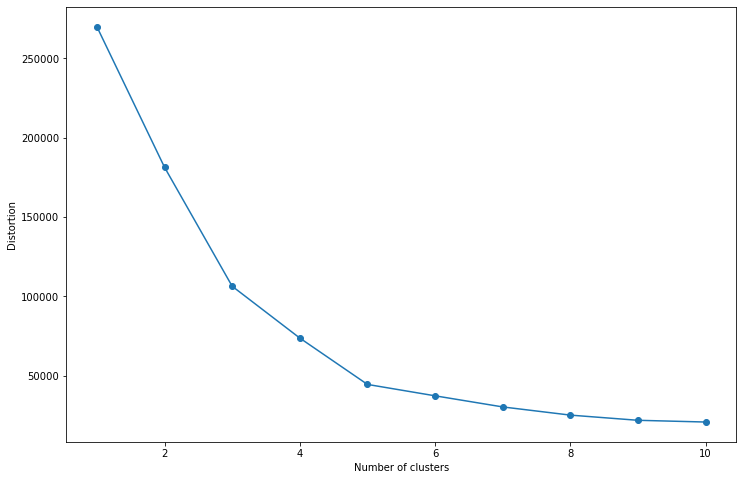

In [45]:
# Values of k are stored with the inertia of clusters belongings to k.

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 
    
plot_distortion(df_2d, max_clusters=10)

* fit model with optimal number of clusters

In [72]:
km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0) # set the random_state parameter to easily reproduce the results.

In [73]:
# find kmeans for each point
y_km = km.fit_predict(df_2d)
y_km

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

* define function plot_clusters

In [79]:
  def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [77]:
# set(y_km)

* plot clusters

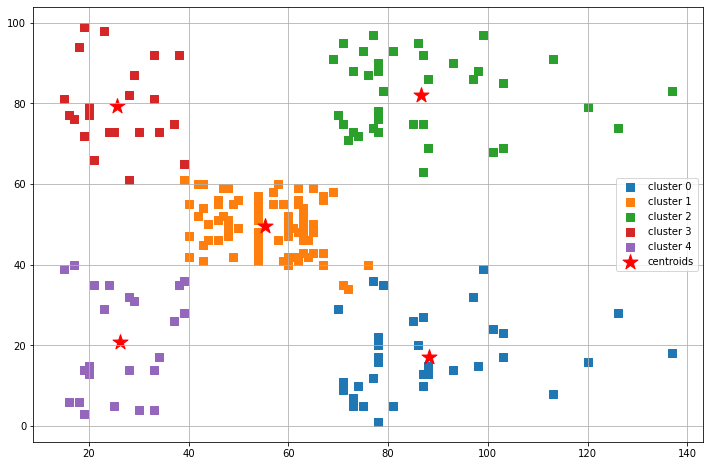

In [80]:
X = df_2d.to_numpy()
plot_clusters(X, y_km, plt_cluster_centers= True)

In [ ]:
# ########################## From lecture

In [57]:
model = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0) # set the random_state parameter to easily reproduce the results.

In [58]:
model.fit(df_2d)  

KMeans(n_clusters=5, random_state=0)

In [59]:
y_pred = model.predict(df_2d)
print(y_pred)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


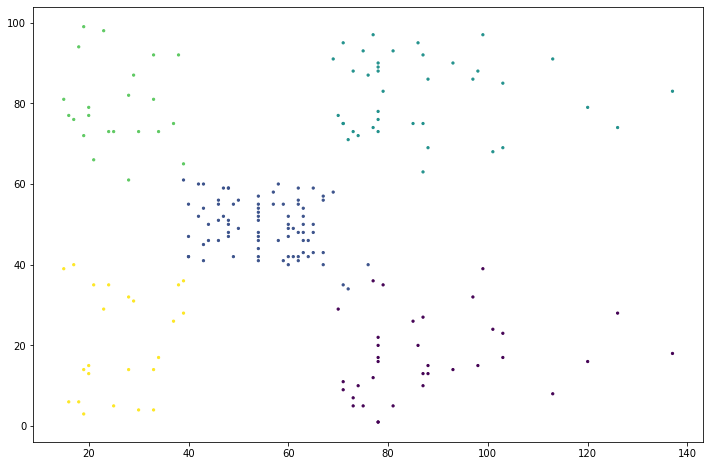

In [64]:
plt.scatter(df_2d.iloc[:,0], df_2d.iloc[:,1], c=y_pred, s=5);